# BCSD Infographic notebook
This notebook provides various processing and infographics on COVID dashboard reporting for Berkeley County School District

## Data imported and added to dataframe

In [21]:
import csv
import pprint as pp
from datetime import datetime, date, time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


with open('./output/data.csv', 'r') as fp:
    df = pd.read_csv(fp, parse_dates=['Date','DateTime'], infer_datetime_format=True)

    # Drop any duplicate data entries
    cleaned_df = df.drop_duplicates(['School','Date'], keep='last')

## List all schools and areas the district is tracking

In [22]:
print(f"The school district is tracking {len(cleaned_df.School.unique())} schools, offices or departments.")
print(f"Here is the full list.")
pp.pprint(list(cleaned_df.School.unique()), compact=True, width=120)

The school district is tracking 79 schools, offices or departments.
Here is the full list.
['Berkeley County School District', 'Mount Holly Elementary', 'Academic Services', 'Administrative Services',
 'Adult Education - Hanahan', 'Adult Education - Moncks Corner', 'Berkeley Alternative', 'Berkeley Elementary',
 'Berkeley High School', 'Berkeley Intermediate', 'Berkeley Middle', 'Berkeley Middle College', 'Board of Education',
 'Bonner Elementary', 'Boulder Bluff Elementary', 'Bowens Corner Elementary', 'Cainhoy Elementary',
 'Cane Bay Elementary', 'Cane Bay High', 'Cane Bay Middle', 'Capital Improvements', 'Career Technical Ed', 'CDEP',
 'Child Nutrition', 'College Park Elementary', 'College Park Middle', 'Communications / Public Relations',
 'Cross Elementary', 'Cross High', 'Daniel Island School', 'Dist Office Transportation', 'Evaluation & Leadership',
 'Financial Services', 'First Steps', 'Foxbank Elementary', 'Goose Creek Elementary', 'Goose Creek High',
 'Hanahan Elementary', 'H

## Top 5 Highest Schools Today

###  By Student Count

In [23]:
most_recent_date = cleaned_df.Date.max().date()
if most_recent_date != date.today():
    print(f"Data is not available for today: {date.today()}")
    print(f"Most recent date with data is {most_recent_date}")
cases_today = cleaned_df[cleaned_df.Date >= datetime.combine(most_recent_date,time())]
highest_student_cnt = cases_today.sort_values(by=["Student Count"], ascending=False)
highest_student_cnt[highest_student_cnt.School!='Berkeley County School District'].head()

Data is not available for today: 2021-08-29
Most recent date with data is 2021-08-27


,School,Area,Date,Staff Count,Student Count,DateTime
266,Cane Bay High,Summerville,2021-08-27,7,62,2021-08-27 04:38:21
256,Berkeley High School,Moncks Corner,2021-08-27,0,58,2021-08-27 04:38:21
315,Stratford High,Goose Creek,2021-08-27,3,38,2021-08-27 04:38:21
285,Goose Creek High,Goose Creek,2021-08-27,1,29,2021-08-27 04:38:21
261,Bonner Elementary,Moncks Corner,2021-08-27,5,28,2021-08-27 04:38:21


### By Staff Count

In [24]:
highest_staff_cnt = cases_today.sort_values(by=["Staff Count"], ascending=False)
highest_staff_cnt[highest_staff_cnt.School!='Berkeley County School District'].head()

,School,Area,Date,Staff Count,Student Count,DateTime
266,Cane Bay High,Summerville,2021-08-27,7,62,2021-08-27 04:38:21
307,Sangaree Elementary,Summerville,2021-08-27,5,13,2021-08-27 04:38:21
261,Bonner Elementary,Moncks Corner,2021-08-27,5,28,2021-08-27 04:38:21
299,Nexton Elementary,Summerville,2021-08-27,4,27,2021-08-27 04:38:21
298,Mount Holly Elementary,Goose Creek,2021-08-27,4,17,2021-08-27 04:38:21


## Top 5 Highest Schools All Time

###  By Student Count

In [25]:
all_time_students = cleaned_df.sort_values(by=["Student Count","School"], ascending=False).drop_duplicates(["School"], keep='first')
all_time_students[all_time_students.School!='Berkeley County School District'].head()

,School,Area,Date,Staff Count,Student Count,DateTime
266,Cane Bay High,Summerville,2021-08-27,7,62,2021-08-27 04:38:21
256,Berkeley High School,Moncks Corner,2021-08-27,0,58,2021-08-27 04:38:21
236,Stratford High,Goose Creek,2021-08-26,3,38,2021-08-26 04:29:05
285,Goose Creek High,Goose Creek,2021-08-27,1,29,2021-08-27 04:38:21
261,Bonner Elementary,Moncks Corner,2021-08-27,5,28,2021-08-27 04:38:21


### By Staff Count

In [26]:
all_time_students = cleaned_df.sort_values(by=["Staff Count","School"], ascending=False).drop_duplicates(["School"], keep='first')
all_time_students[all_time_students.School!='Berkeley County School District'].head()

,School,Area,Date,Staff Count,Student Count,DateTime
29,Cane Bay High,Summerville,2021-08-24,8,43,2021-08-24 08:59:02
228,Sangaree Elementary,Summerville,2021-08-26,6,13,2021-08-26 04:29:05
216,Maintenance,Moncks Corner,2021-08-26,5,0,2021-08-26 04:29:05
49,Hanahan Elementary,Hanahan,2021-08-24,5,7,2021-08-24 08:59:02
103,Bonner Elementary,Moncks Corner,2021-08-25,5,19,2021-08-25 03:29:15


## Graphs

### BCSD - 14 Day Cumulative reported daily

[]

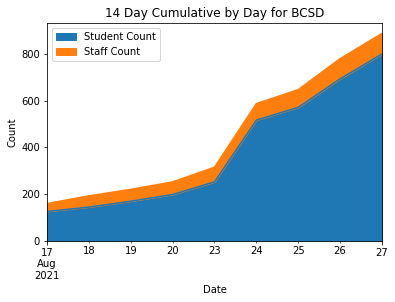

In [27]:
district = cleaned_df[cleaned_df.School=='Berkeley County School District']
bcsd_ax = district.plot("Date",["Student Count", "Staff Count"], kind='area', ylabel='Count', title="14 Day Cumulative by Day for BCSD")
bcsd_ax.plot()

### Mount Holly Elementary

[]

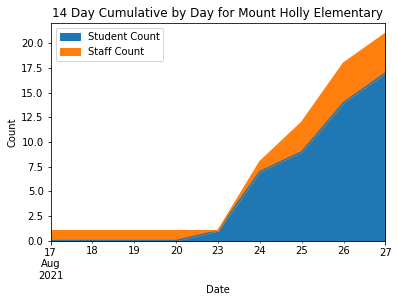

In [28]:
district = cleaned_df[cleaned_df.School=='Mount Holly Elementary']
mhe_ax = district.plot("Date",["Student Count", "Staff Count"], kind='area', ylabel='Count', title="14 Day Cumulative by Day for Mount Holly Elementary")
mhe_ax.plot()

### Bonner Elementary

[]

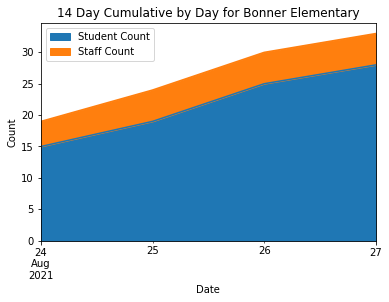

In [29]:
district = cleaned_df[cleaned_df.School=='Bonner Elementary']
bonn_ax = district.plot("Date",["Student Count", "Staff Count"], kind='area', ylabel='Count', title="14 Day Cumulative by Day for Bonner Elementary")
bonn_ax.plot()

### All Schools

In [30]:
"""fig, axs = plt.subplots(len(list(cleaned_df.School.unique())))
fig.set_size_inches(6.4,4.8*79)
fig.suptitle('All Schools')
for ax, single_school in zip(axs, list(cleaned_df.School.unique())):
    current_school = cleaned_df[cleaned_df.School==single_school]
    ax.stackplot(current_school.Date,current_school["Student Count"], current_school["Staff Count"])
"""
print("This capability may best be explored in an interactive way.")
        
        


This capability may best be explored in an interactive way.
